In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='ignore')

# Дані A/B тесту
df = pd.read_csv('ab_test_data.csv')

# Конвертуємо стовпець timestamp у формат datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Завдання 1. 

Зчитай дані з файлу та виведи інформацію про результати A/B тесту:

    * Кількість користувачів в групах A та B відповідно;
    * Кількість конверсій в групах A та B відповідно;
    * Рівень конверсії в групах A та B відповідно;
    * Дату початку та дату кінця тесту, а також тривалість тесту в днях.

In [2]:
# Кількість користувачів в групах
group_counts = df['test_group'].value_counts()
print(f"Кількість користувачів в групі A: {group_counts['a']}")
print(f"Кількість користувачів в групі B: {group_counts['b']}")

# Кількість конверсій в групах
conversion_counts = df.groupby('test_group')['conversion'].sum()
print(f"Кількість конверсій в групі A: {conversion_counts['a']}")
print(f"Кількість конверсій в групі B: {conversion_counts['b']}")

# Рівень конверсії в групах
conversion_rates = df.groupby('test_group')['conversion'].mean() * 100
print(f"Рівень конверсії в групі A: {conversion_rates['a']:.2f}%")
print(f"Рівень конверсії в групі B: {conversion_rates['b']:.2f}%")

# Дати початку та кінця тесту, а також тривалість тесту в днях
start_date = df['timestamp'].min().date()
end_date = df['timestamp'].max().date()
duration = (end_date - start_date).days
print(f"Дата початку тесту: {start_date}")
print(f"Дата кінця тесту: {end_date}")
print(f"Тривалість тесту (в днях): {duration}")

Кількість користувачів в групі A: 10013
Кількість користувачів в групі B: 9985
Кількість конверсій в групі A: 611
Кількість конверсій в групі B: 889
Рівень конверсії в групі A: 6.10%
Рівень конверсії в групі B: 8.90%
Дата початку тесту: 2023-07-03
Дата кінця тесту: 2023-07-25
Тривалість тесту (в днях): 22


#### Завдання 2.

Обери статистичний критерій для тестування гіпотез на свій розсуд та обрахуй значення статистики та p-value. Перевір, чи можемо ми відхили нульову гіпотезу. Не забудь уточнити, який критерій використовуєш 😉

In [3]:
# Обираємо критерій хі-квадрат (Chi-squared test), оскільки ми маємо дві незалежні групи та бінарні результати (конверсія/не конверсія).

contingency_table = pd.crosstab(df['test_group'], df['conversion'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Результати тесту хі-квадрат:")
print(f"Статистика хі-квадрат: {chi2:.2f}")
print(f"P-значення: {p:.3f}")

alpha = 0.05
if p < alpha:
    print("P-значення менше за рівень значущості (0.05), тому ми відхиляємо нульову гіпотезу.")
    print("Існує статистично значуща різниця між рівнями конверсії в групах A та B.")
else:
    print("P-значення більше за рівень значущості (0.05), тому ми не можемо відхилити нульову гіпотезу.")
    print("Немає статистично значущої різниці між рівнями конверсії в групах A та B на даному рівні значущості.")

Результати тесту хі-квадрат:
Статистика хі-квадрат: 56.14
P-значення: 0.000
P-значення менше за рівень значущості (0.05), тому ми відхиляємо нульову гіпотезу.
Існує статистично значуща різниця між рівнями конверсії в групах A та B.


#### Завдання 3. 
Побудуй візуалізацію для порівняння середніх значень у групах з 95% довірчими інтервалами

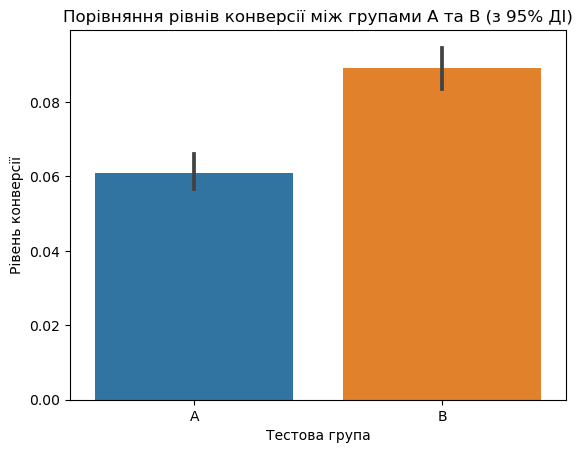

In [4]:
sns.barplot(x='test_group', y='conversion', data=df, errorbar='ci', ci=95)
plt.title('Порівняння рівнів конверсії між групами A та B (з 95% ДІ)')
plt.xlabel('Тестова група')
plt.ylabel('Рівень конверсії')
plt.xticks(ticks=[0, 1], labels=['A', 'B'])
plt.savefig('ConversComparison.png')
plt.show()

#### Завдання 4. 
Підготуй висновки про результати A/B тесту згідно з рекомендаціями, з якими ми ознайомились в цій темі

In [5]:
print("Висновки за результатами A/B тесту:")
print(f"Початковий рівень конверсії (група A): {conversion_rates['a']:.2f}%")
print(f"Рівень конверсії в новій групі (група B): {conversion_rates['b']:.2f}%")

if p < alpha:
    print("На основі статистичного тесту хі-квадрат, ми можемо зробити висновок, що існує статистично значуща різниця між рівнями конверсії в групах A та B.")
    if conversion_rates['b'] > conversion_rates['a']:
        print("Новий дизайн (група B) показав статистично значуще вищий рівень конверсії порівняно з початковим дизайном (група A).")
    else:
        print("Новий дизайн (група B) показав статистично значуще нижчий рівень конверсії порівняно з початковим дизайном (група A).")
else:
    print("На основі статистичного тесту хі-квадрат, ми не виявили статистично значущої різниці між рівнями конверсії в групах A та B.")
    print("Немає достатньо доказів, щоб стверджувати, що зміна дизайну екрана підписки суттєво вплинула на конверсію.")

Висновки за результатами A/B тесту:
Початковий рівень конверсії (група A): 6.10%
Рівень конверсії в новій групі (група B): 8.90%
На основі статистичного тесту хі-квадрат, ми можемо зробити висновок, що існує статистично значуща різниця між рівнями конверсії в групах A та B.
Новий дизайн (група B) показав статистично значуще вищий рівень конверсії порівняно з початковим дизайном (група A).


#### Бонусне завдання:
Побудуй графік, що відображатиме зміну конверсії в часі. І не забувай врахувати, що на цей раз в нас дійсно є дані про час здійснення івенту.

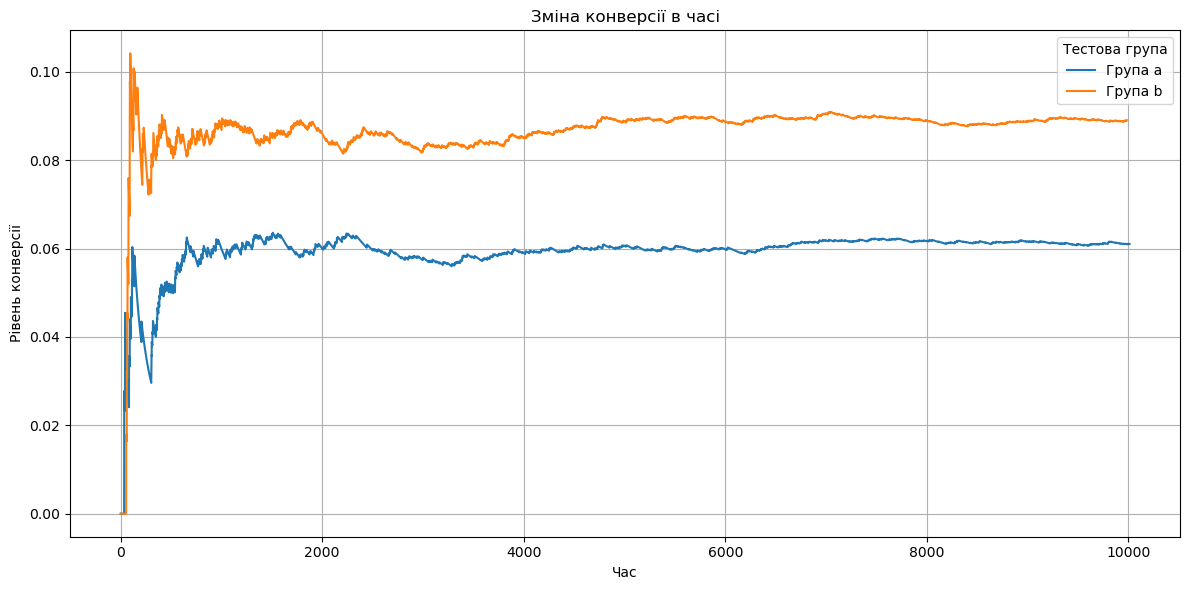

In [6]:
# Сортуємо дані за часом
df = df.sort_values(by='timestamp')

# Встановлюємо timestamp як індекс для зручної агрегації за часом
test_data = df.set_index('timestamp')

# Рахуємо кумулятивне середнє - це і є зміна конверсії з плином часу
cumulative_metric_a = test_data[test_data['test_group'] == 'a']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = test_data[test_data['test_group'] == 'b']['conversion'].expanding().mean().reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(cumulative_metric_a, label='Група a')
plt.plot(cumulative_metric_b, label='Група b')

plt.title('Зміна конверсії в часі')
plt.xlabel('Час')
plt.ylabel('Рівень конверсії')
plt.legend(title='Тестова група')
plt.grid(True)
plt.tight_layout()
plt.savefig('ConversChange.png')
plt.show()